# Project on Health Care
## Prediction of Cardio Vascular Disease using Machine Learning

In [1]:
#import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('1645792390_cep1_dataset.xlsx')   #read the data

In [3]:
data.head()   # display the first five rows of the dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Preliminary Analysis:

In [4]:
data.shape    # check the number of rows and columns

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
d2=data.duplicated(keep='first')    #Chech for duplicate values. False means unique values.
d2                                  

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

<div class="alert alert-info">
After checking for duplicates, we have got back all the 303 rows without discarding any of the rows. This means that there are no duplicate values

In [7]:
d1=data.isnull().sum()  #check for missing values
d3=data.nunique()       #check for unique values
d4= data.dtypes         #check for the datatypes

In [8]:
#convert all the data into dataframes
d1=d1.to_frame().reset_index()
d3=d3.to_frame().reset_index()
d4=d4.to_frame().reset_index()

In [9]:
#rename the columns relevantly
d1=d1.rename(columns= {0: 'Missing Data'})
d3=d3.rename(columns={0: 'Unique Data'})
d4=d4.rename(columns={0: 'Data Type'})

In [10]:
# merge all the dataframes into one
df=pd.merge(d1, d3, on='index')
df=pd.merge(df, d4, on='index')
print(df)

       index  Missing Data  Unique Data Data Type
0        age             0           41     int64
1        sex             0            2     int64
2         cp             0            4     int64
3   trestbps             0           49     int64
4       chol             0          152     int64
5        fbs             0            2     int64
6    restecg             0            3     int64
7    thalach             0           91     int64
8      exang             0            2     int64
9    oldpeak             0           40   float64
10     slope             0            3     int64
11        ca             0            5     int64
12      thal             0            4     int64
13    target             0            2     int64


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


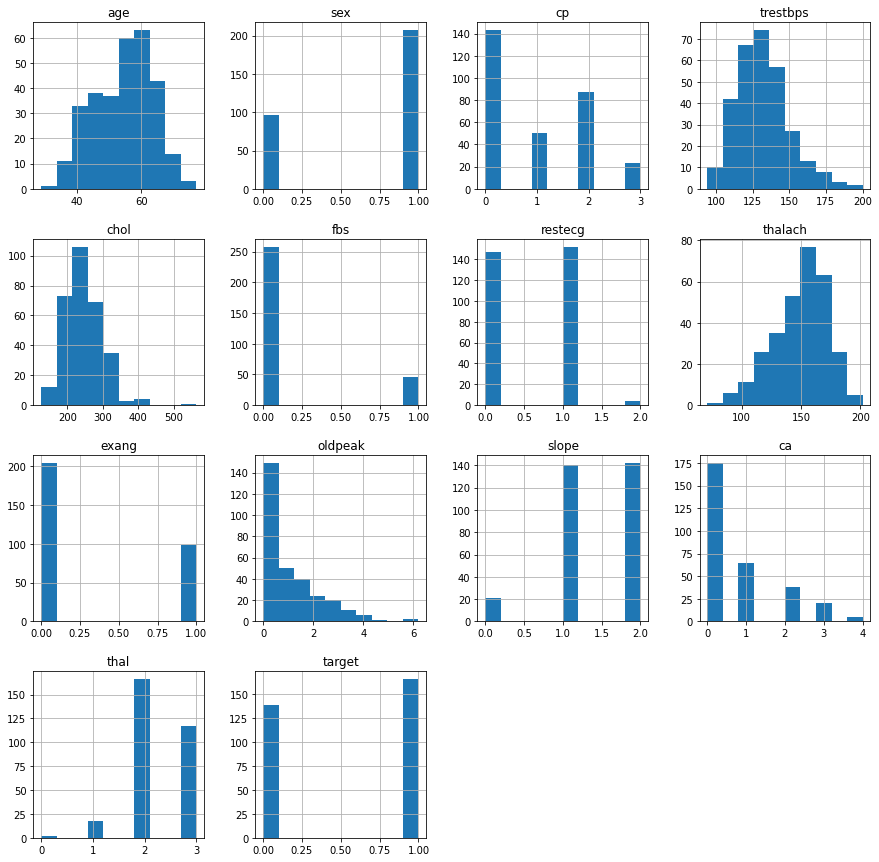

In [12]:
#Let us Visualise the data
data.hist(figsize=(15,15));

<div class="alert alert-info">
From the above graphs, we can see that 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' and 'target' columns are categorical columns 

#### Visualizing the Categorical columns 

In [13]:
target_values= data.target.value_counts()  #1 = having cardiovascular disease. 0 = not having cardiovascular disease
target_values

1    165
0    138
Name: target, dtype: int64

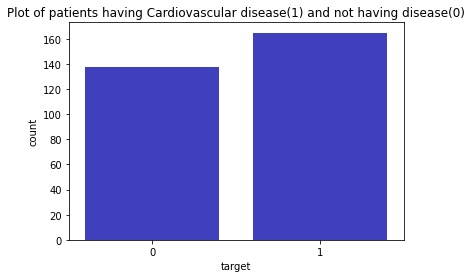

In [14]:
# visualize the patients having Heart disease and not having Heart disease
sns.countplot(x='target', data=data, color='blue', saturation=0.5)
plt.title('Plot of patients having Cardiovascular disease(1) and not having disease(0)')
plt.show()

In [15]:
print(data.sex.value_counts())

1    207
0     96
Name: sex, dtype: int64


#### 1 indicates Male. 0 indicates Female

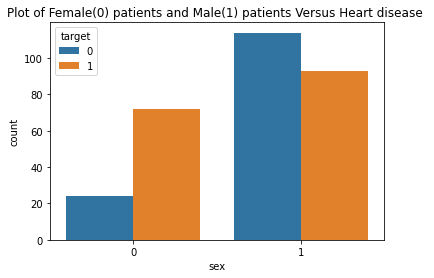

In [16]:
sns.countplot(x='sex', data=data, hue='target') 

plt.title('Plot of Female(0) patients and Male(1) patients Versus Heart disease ')
plt.show()

<div class="alert alert-danger">
Plot shows that more number of Female patients have Heart Disease than Male patients

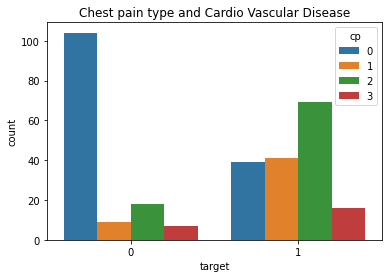

In [17]:
sns.countplot(x='target', data=data, hue='cp')
plt.title('Chest pain type and Cardio Vascular Disease')
plt.show()

<div class="alert alert-info">
Plot shows that Chest pain type 2 have maximum heart attacks and Chest pain type 0 do not have Heart Attacks

In [18]:
data.fbs.value_counts()  #fasting blood pressure >120. 1=True and 0=False

0    258
1     45
Name: fbs, dtype: int64

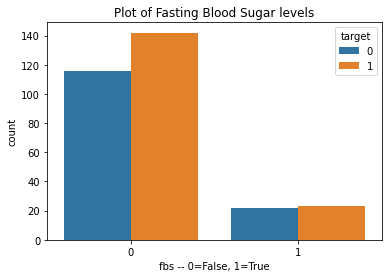

In [19]:
sns.countplot(x='fbs', data=data, hue='target')
plt.title('Plot of Fasting Blood Sugar levels')
plt.xlabel('fbs -- 0=False, 1=True')
plt.show()

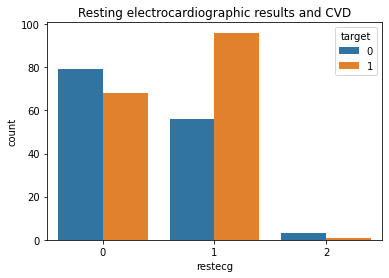

In [20]:
sns.countplot(x='restecg', data=data, hue='target')
plt.title('Resting electrocardiographic results and CVD')
plt.show()

<div class="alert alert-success">
Graph shows that Resting ECG of type 1 have maximum number of Heart Attacks

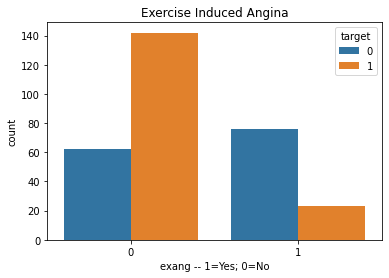

In [21]:
sns.countplot(x='exang', data=data, hue='target')
plt.title('Exercise Induced Angina')
plt.xlabel('exang -- 1=Yes; 0=No')
plt.show()

<div class="alert alert-info">
Feature 'Exercise Induced Angina = No' has higher number of Heart Attacks

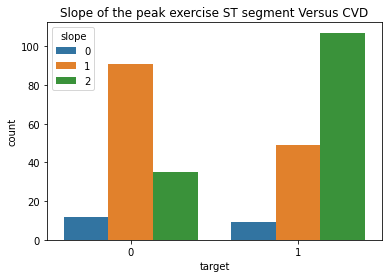

In [22]:
sns.countplot(x='target', data=data, hue='slope')
plt.title('Slope of the peak exercise ST segment Versus CVD')
plt.show()

<div class ="alert alert-danger">
Slope of the peak exercise ST segment of type 2 have maximum Heart Disease

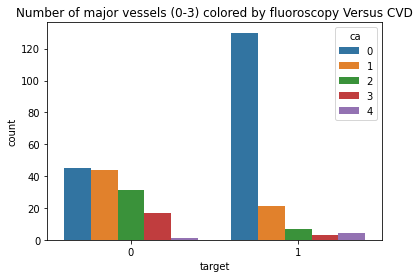

In [23]:
sns.countplot(x='target', data=data, hue='ca')
plt.title('Number of major vessels (0-3) colored by fluoroscopy Versus CVD')
plt.show()

<div class="alert alert-info">
Number of major vessels (0-3) colored by fluoroscopy of Type 0  has maximum number of Heart Attacks

#### Composition of all the patients with respect to 'Gender'. 0--> Female, 1-->Male

In [24]:
print(data.groupby('sex').agg(['mean', 'count']))

           age              cp          trestbps              chol        \
          mean count      mean count        mean count        mean count   
sex                                                                        
0    55.677083    96  1.041667    96  133.083333    96  261.302083    96   
1    53.758454   207  0.932367   207  130.946860   207  239.289855   207   

         fbs        ...   oldpeak           slope              ca        \
        mean count  ...      mean count      mean count      mean count   
sex                 ...                                                   
0    0.12500    96  ...  0.876042    96  1.427083    96  0.552083    96   
1    0.15942   207  ...  1.115459   207  1.386473   207  0.811594   207   

         thal          target        
         mean count      mean count  
sex                                  
0    2.125000    96  0.750000    96  
1    2.400966   207  0.449275   207  

[2 rows x 26 columns]


#### Let us compare the CVD with respect to 'Age' feature

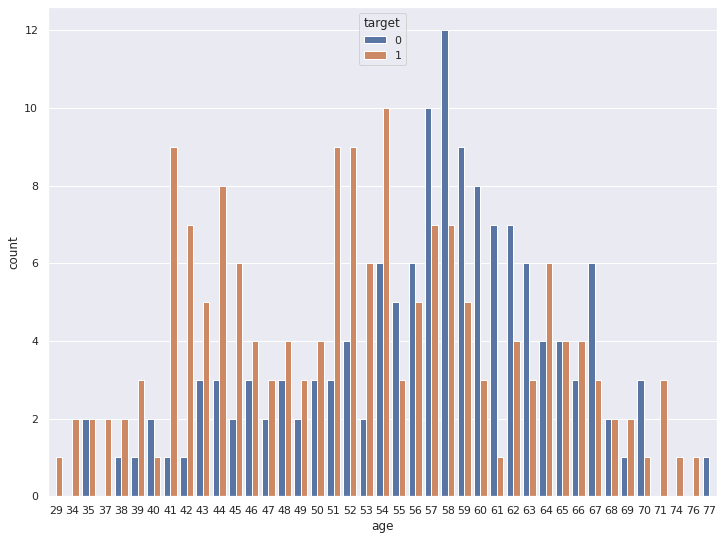

In [25]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style=('darkgrid')
sns.countplot(x='age',hue='target', data=data) 
plt.show()

<div class="alert alert-info">
The plot shows that the CardioVascular disease is highest at 54 years of age, followed by 41, 51 and 52 years 

#### Visualize the 'Resting Blood Pressure' with respect to the target

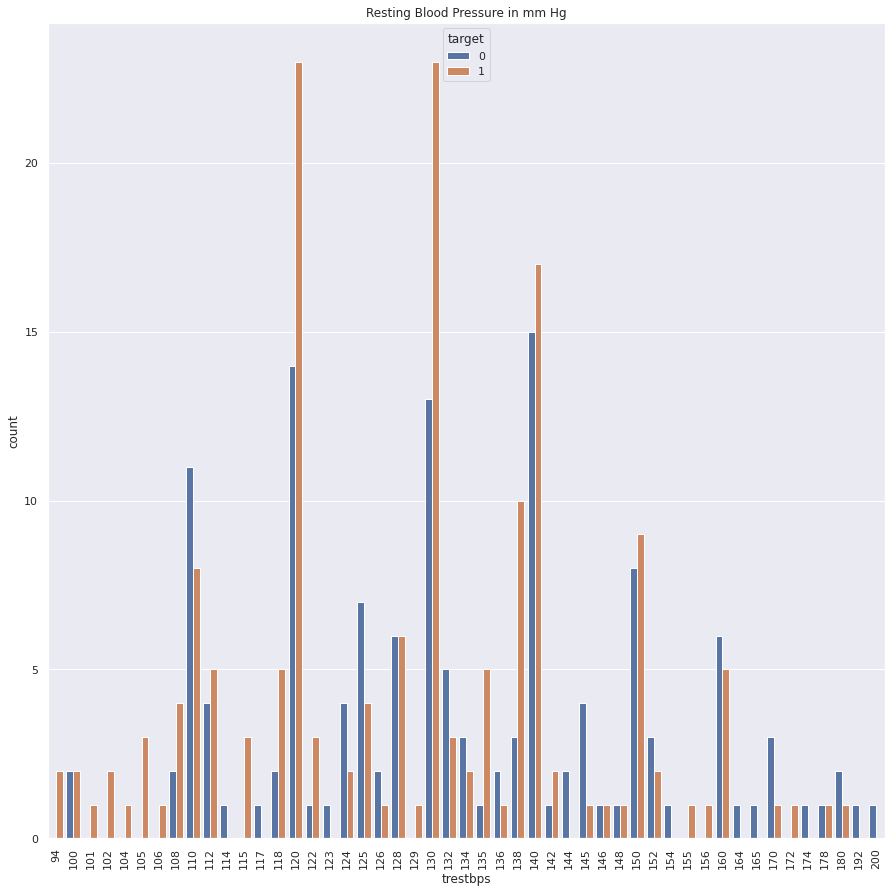

In [26]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(x='trestbps', data=data, hue='target') 
plt.xticks(rotation=90)
plt.title('Resting Blood Pressure in mm Hg')
plt.show()

<div class="alert-danger">
Plot shows that 'trestbps' is right skewed. Maximum heart attacks have occured at Resting Blood Pressure = 120 and 130

#### Plot of Cholesterol versus Cardio Vascular Disease

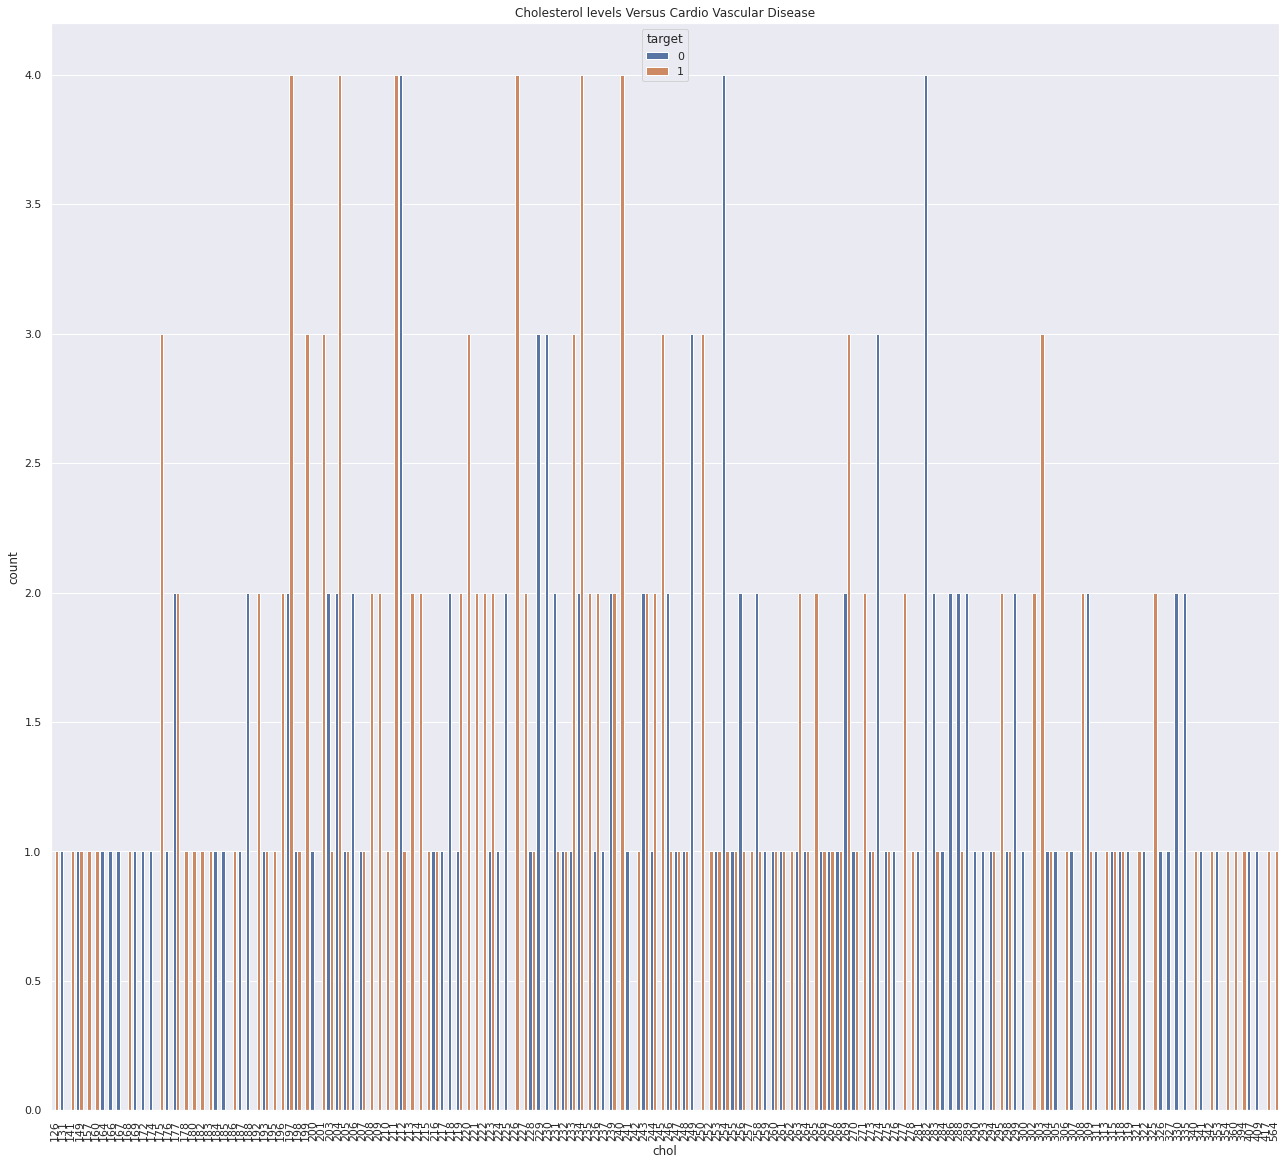

In [27]:
sns.set(rc={'figure.figsize':(22,20)})
plt.xticks(rotation=90)
plt.title('Cholesterol levels Versus Cardio Vascular Disease')
sns.countplot(x='chol', data=data, hue='target')
plt.show()

<div class="alert alert-warning">
At cholesterol levels between 195 and 240, there is a good chance of having a heart attack. 

#### Visualization of Peak Exercising with respect to the Occurance of a Heart Attack

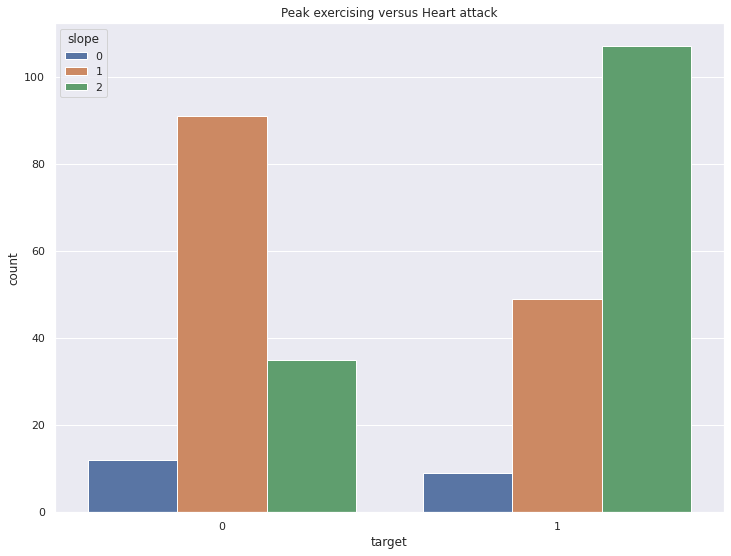

In [28]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x='target', data=data, hue='slope')
plt.title('Peak exercising versus Heart attack')
plt.show()

<div class="alert alert-danger">
Peak exercising '2' has a significant impact on Heart Attack.

#### Graph of Thalassemia versus Heart attack

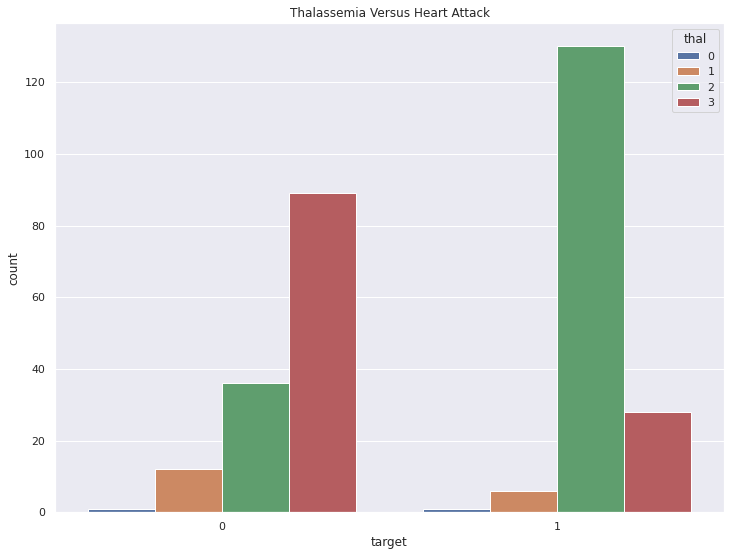

In [29]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x='target', data=data, hue='thal')
plt.title('Thalassemia Versus Heart Attack')
plt.show()

<div class="alert alert-info">
Thalassemia of type '2' has a significant impact on the occurance of a Heart Attack

In [30]:
#store Numerical columns and Categorical columns separately
num_cols=data[['age','trestbps','chol','thalach', 'oldpeak', 'target']]
#num_cols
cat_cols=data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
#cat_cols

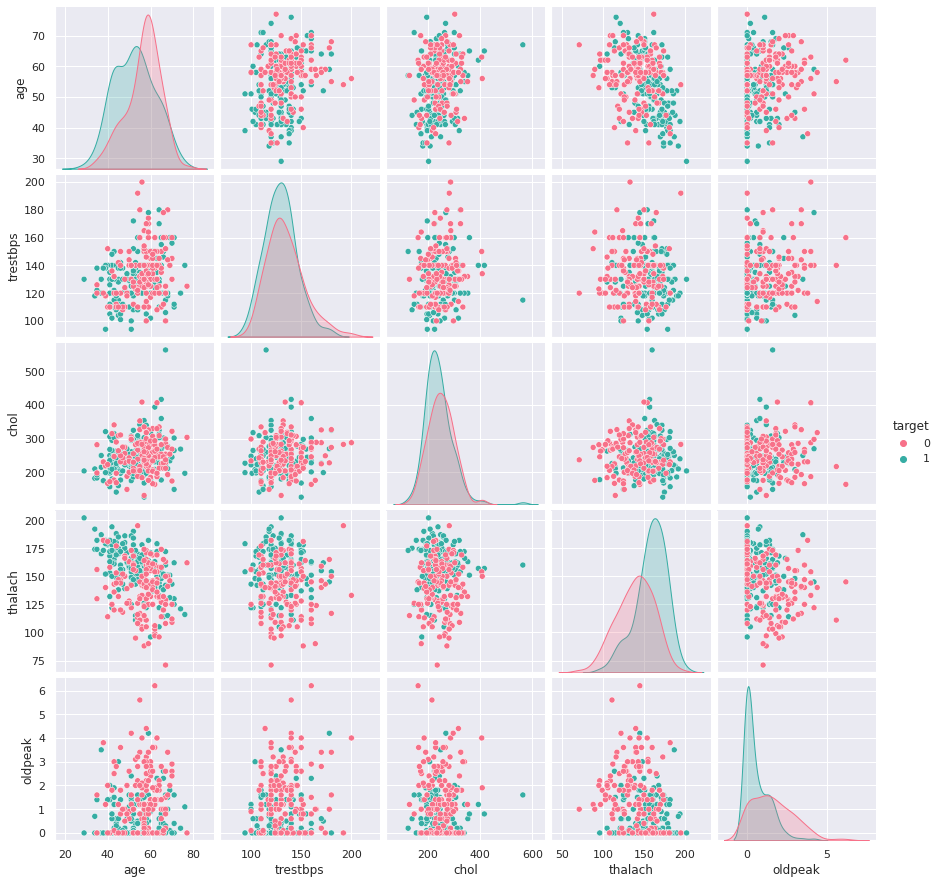

In [31]:
#pair plot of Numerical columns
sns.pairplot(num_cols, hue='target', palette='husl')

<div class="alert alert-danger">
Pair plot shows relationship of Numerical columns with respect to target column. Except for the feature 'Age', all the other features show correlation with the target.

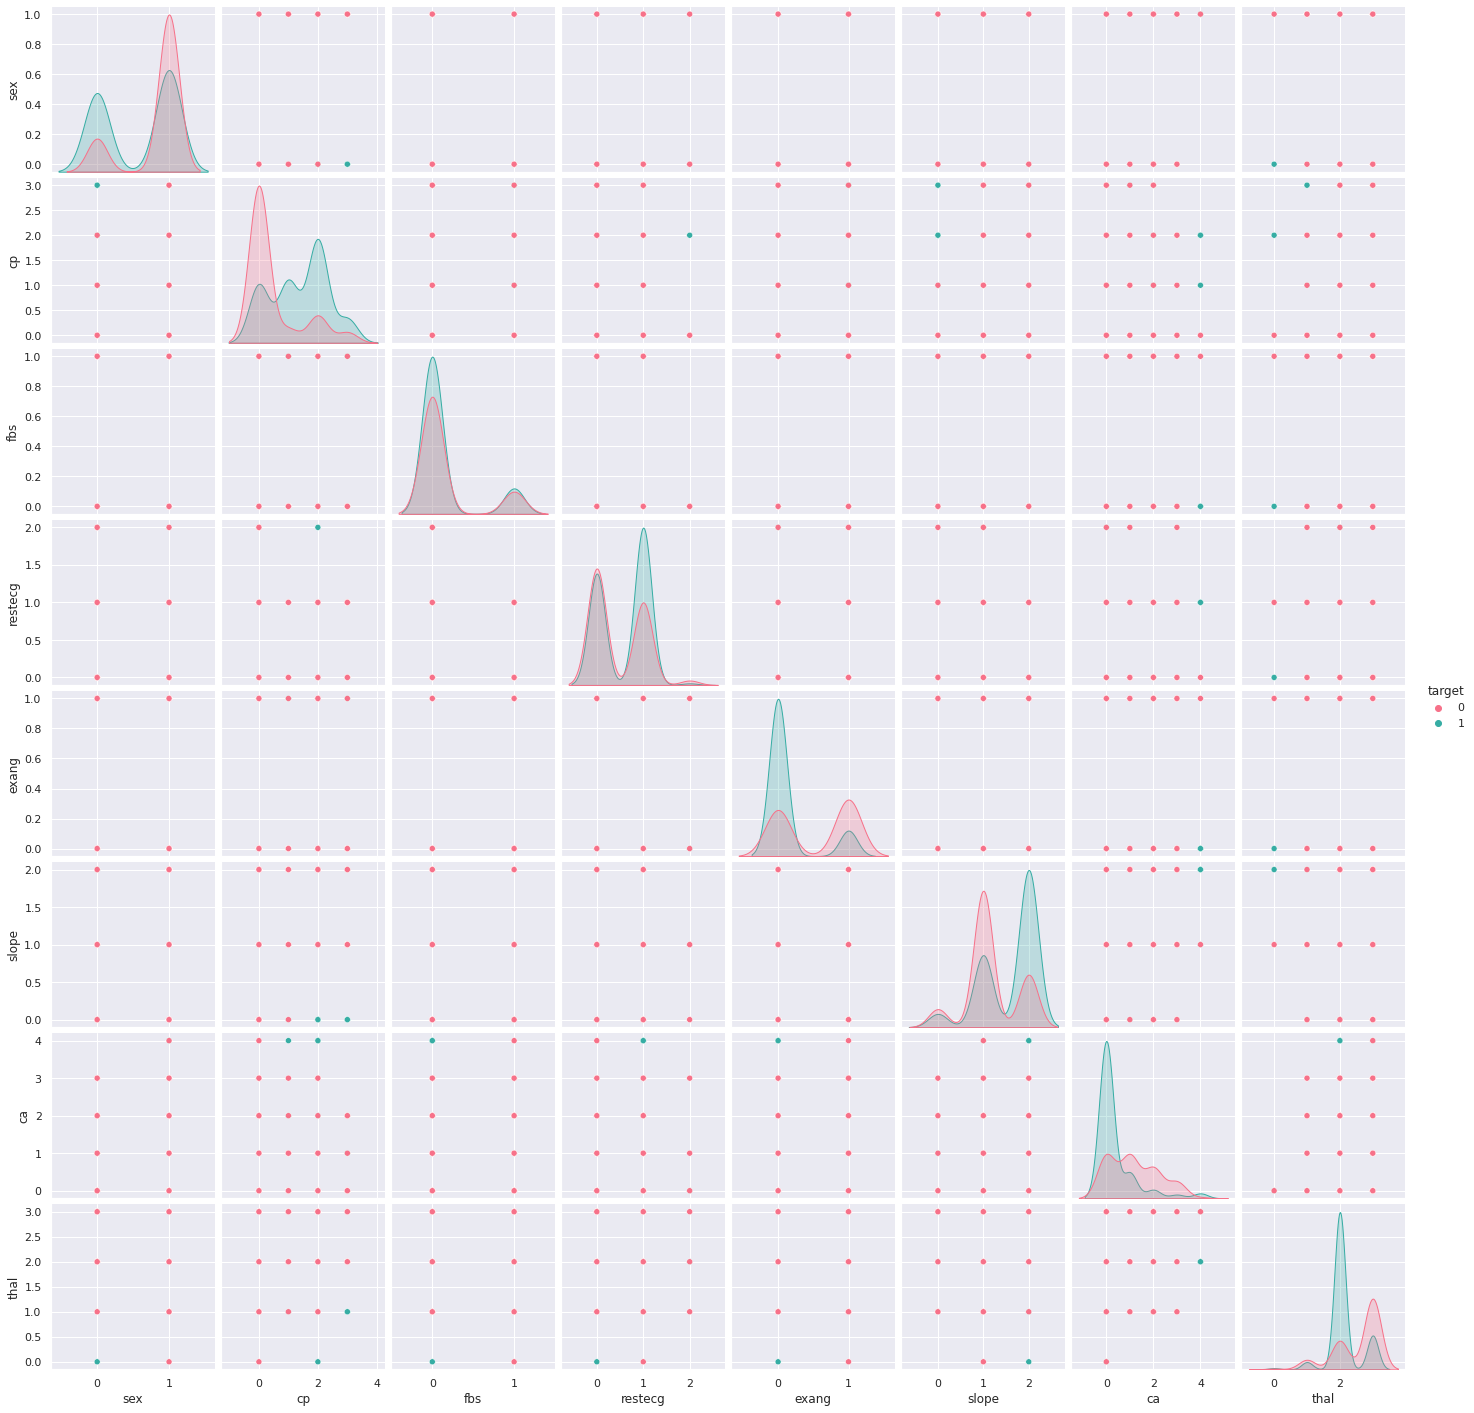

In [32]:
#pair plot of categorical columns
sns.pairplot(cat_cols, hue='target', palette='husl')

<div class="alert-info">
Pair plot shows the relationship of Categorical Columns with the target column. We can see that the number of Male patients 'not having' a Heart disease is higher. Heart disease among Female patients is high. 

Patients with the feature 'Chest Pain type (cp)' 0 have no Heart disease. 

Patients with the feature 'Slope of the peak exercise ST segment (Slope)' of type 2 have Heart Attacks as compared to 'Slope 0' and 'Slope 1'. 

Feature 'Restecg' of type 1 have Heart Attacks.

Features 'Number of major vessels (0-3) colored by fluoroscopy (ca)' of type 0 show Heart attacks and 'Thalassemia (thal)' of type 2 have maximum number of Heart Attacks.


In [33]:
#store the target column in target_col
target_col=data[['target']]

In [34]:
#drop the target column from the num_cols since we have to use it to train the model
num_cols=num_cols.drop(['target'], axis=1)

In [35]:
num_cols.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [36]:
#delete the target column from the cat_cols dataframe
cat_cols=cat_cols.drop(['target'], axis=1)
cat_cols.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


### Feature engineering the multiclass categorical columns using one hot encoding

In [37]:
cat_cols_1=pd.get_dummies(cat_cols.cp, prefix='cp').iloc[:, 1:]
cat_cols_2=pd.get_dummies(cat_cols.restecg, prefix='restecg').iloc[:, 1:]
cat_cols_3=pd.get_dummies(cat_cols.slope, prefix='slope').iloc[:, 1:]
cat_cols_4=pd.get_dummies(cat_cols.ca, prefix='ca').iloc[:, 1:]
cat_cols_5=pd.get_dummies(cat_cols.thal, prefix="thal").iloc[:, 1:]

In [38]:
#drop the original multiclass categorical columns
cat_cols=cat_cols.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
#cat_cols

In [39]:
#concat the numerical columns, binary columns and feature engineered columns
df_new= pd.concat([num_cols, cat_cols, cat_cols_1, cat_cols_2, cat_cols_3, cat_cols_4, cat_cols_5, target_col], axis=1)

In [40]:
#display the first 5 rows of the new dataframe
df_new.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp_1,cp_2,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,63,145,233,150,2.3,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1


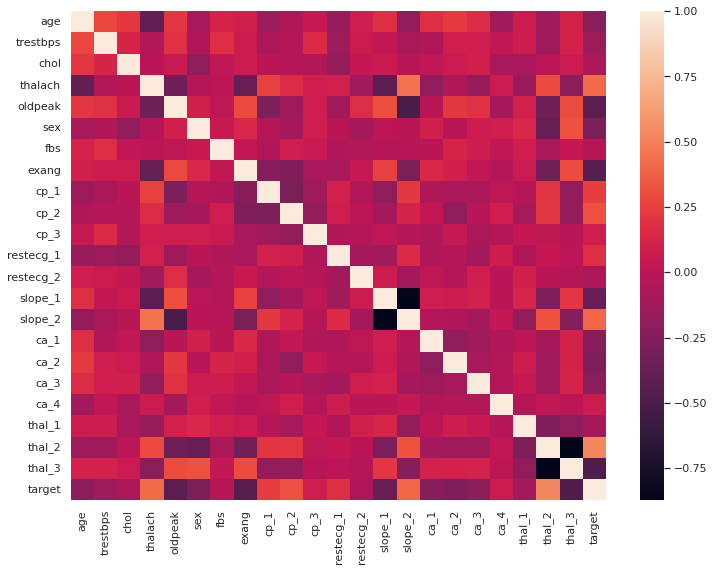

In [41]:
#plot a heatmap in order to check the correlation between the feature variables
sns.heatmap(df_new.corr())
plt.show()

## Correlation Analysis:

<div class="alert-danger">
The heatmap shows dark areas as negatively correlated and light areas as positively correlated features.
From the heatmap we can see that 'thalach', 'cp_2', 'slope_2 and 'thal_2' are positively correlated with the target.
'slope_2' is positively correlated with 'thalach' and negatively correlated with 'oldpeak'. 'thalach' is negatively correlated with 'age'

### Model Building

In [42]:
#let's split the data into training and testing using train_test_split model 
from sklearn.model_selection import train_test_split
X=df_new.drop(['target'], axis=1)
y=df_new["target"]

In [43]:
print(X.shape)
print(y.shape)

(303, 22)
(303,)


In [44]:
#set the testing size to 20% and training size to 80%
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
#fit the data using Logistic Regression
from sklearn.linear_model import LogisticRegression
Logreg=LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
#check the accuracy score and f1 score
accuracy=Logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression :  ', accuracy*100)

from sklearn.metrics import f1_score
y_pred=Logreg.predict(X_test)
f1=f1_score(y_pred, y_test)
print('f1_score : ', f1) 


Accuracy of Logistic Regression :   77.04918032786885
f1_score :  0.7941176470588235


In [47]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[20 10]
 [ 4 27]]


<div class="alert alert alert-danger">
From the confusion matrix, we can see that the model predicted 20 true positives ( occurance of a Heart Attack) and 27 true negatives (Non occurance of a Heart Attack)

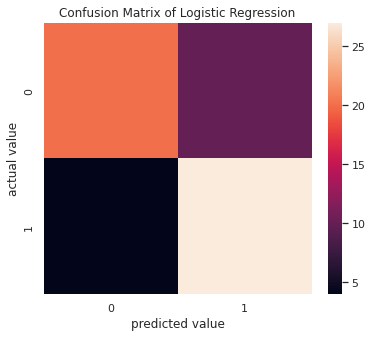

In [48]:
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(con_mat)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.title('Confusion Matrix of Logistic Regression');

In [49]:
# get the Precision, Recall and f1 score
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.87      0.73      0.79        37

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



<div class="alert alert-info">
Precision is the ratio of True Positive and Sum of True Positive and False Positive. Precision gives us the percentage of Positive Cases from Total Predicted cases. Precision = 0.87
Recall is the ratio of True Positive and Sum of True Positive and False Negative. Recall gives us the percentage of how many total Positive cases were Predicted correctly with our model. Recall = 0.73
f1-score gives the combined result of Precision and Recall. f1-score=0.79

In [50]:
#import the required library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
# let us check for different n_estimators between 10 and 100 in steps of 10 to check the best fit
for i in range(10, 100, 10):
    rfc=RandomForestClassifier(n_estimators=i, random_state=0)
    
    rfc.fit(X_train, y_train)
    y_predict=rfc.predict(X_test)
    print('n_estimators =  ', i)
    accu=(accuracy_score(y_test, y_predict)*100)
    print('accuracy of Random Forest Classifier =  ',accu)
    print('___________________________________________')

n_estimators =   10
accuracy of Random Forest Classifier =   72.1311475409836
___________________________________________
n_estimators =   20
accuracy of Random Forest Classifier =   72.1311475409836
___________________________________________
n_estimators =   30
accuracy of Random Forest Classifier =   73.77049180327869
___________________________________________
n_estimators =   40
accuracy of Random Forest Classifier =   75.40983606557377
___________________________________________
n_estimators =   50
accuracy of Random Forest Classifier =   75.40983606557377
___________________________________________
n_estimators =   60
accuracy of Random Forest Classifier =   78.68852459016394
___________________________________________
n_estimators =   70
accuracy of Random Forest Classifier =   77.04918032786885
___________________________________________
n_estimators =   80
accuracy of Random Forest Classifier =   77.04918032786885
___________________________________________
n_estimators =   9

<div class="alert alert-danger">
The best fit is when n_estimators = 60, where the accuracy is maximum at 78.6885%. 

In [52]:
#fit the data to a Random Forest Classifier to train the model
rfc=RandomForestClassifier(n_estimators=60, random_state=0)

rfc.fit(X_train, y_train)
y_predict=rfc.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy with Random Forest: ',accuracy_score(y_test, y_predict)*100)  
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy with Random Forest:  78.68852459016394
[[21  9]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



### Accuracy Check:

<div class="alert alert-danger">
Accuracy of the Random Forest Classifier is slightly better at 78.6885% as compared to that of Logistic Regression at 77.0492%

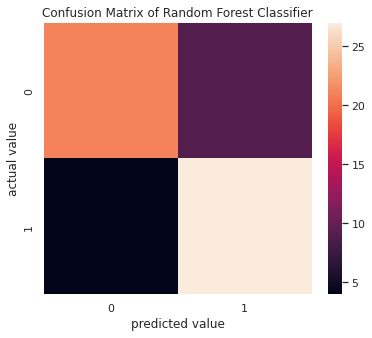

In [54]:
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(confusion_matrix(y_test, y_predict))
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.title('Confusion Matrix of Random Forest Classifier');


### Statistical Analysis:

In [55]:
#let us check the p-values of all the features using statsmodel for feature selection
import statsmodels.api as sm
log_reg=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.272951
         Iterations 8


In [56]:
#print the result of the statsmodel Logit Regression
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                           21
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                  0.6029
Time:                        06:52:04   Log-Likelihood:                -66.054
converged:                       True   LL-Null:                       -166.34
Covariance Type:            nonrobust   LLR p-value:                 2.791e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0143      0.028      0.515      0.607      -0.040       0.069
trestbps      -0.0349      0.014     -2.512      0.012      -0.062      -0.008
chol          -0.0054      0.005     -1.045      0.2

<div class="alert alert-info">
For some of the features, the p-value is less than 0.05. There is a strong relationship between these variables and target (occurance or non-occurance of a heart attack).
we can choose those features whose p-value is less than 0.05 and also standard error less than 1.

In [57]:
# compare the predicted values by the statts model against the actual values
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
Predictions : [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]


In [58]:
print(confusion_matrix(y_test, prediction))
print('Accuracy = ', accuracy_score(y_test, prediction)*100)

[[21  9]
 [ 4 27]]
Accuracy =  78.68852459016394


In [59]:
#Let's select those features whose p-value<0.05 and also standard error<1 and train the model

X_reduced=df_new[[ 'thalach','trestbps','sex', 'cp_2', 'cp_3', 'ca_1', 'ca_2']]
y=df_new[['target']]

In [60]:
from sklearn.model_selection import train_test_split
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

In [61]:
from sklearn.linear_model import LogisticRegression    #fit training data into Logistic Regression Model and Predict the outcome of the target
Logreg=LogisticRegression()
Logreg.fit(X_reduced_train, y_train)

y_predt=Logreg.predict(X_reduced_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy of Logistic Regression = ', accuracy_score(y_test,y_predt)*100)
print(confusion_matrix(y_test, y_predt))
print(classification_report(y_test, y_predt))

Accuracy of Logistic Regression =  81.9672131147541
[[22  5]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [63]:
rfc=RandomForestClassifier(n_estimators=550, random_state=0)  # fit the training data to a Random Forest Classifier with n_estimators=550 and predict
                                                              # the target values
rfc.fit(X_reduced_train, y_train)
y_predicted=rfc.predict(X_reduced_test)

In [64]:
print('Accuracy of Random Forest Classifier = ',accuracy_score(y_test, y_predicted)*100)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy of Random Forest Classifier =  75.40983606557377
[[19  8]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.77      0.79      0.78        34

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



<div class="alert alert-danger">
After feature selection using statsmodel (p-value<0.05) the accuracy of the Logistic Regression Model has improved from 77.0492% to 81.9672%.
Whereas, the accuracy of Random Forest Classifier Model has reduced from 78.6885% to 75.4098%

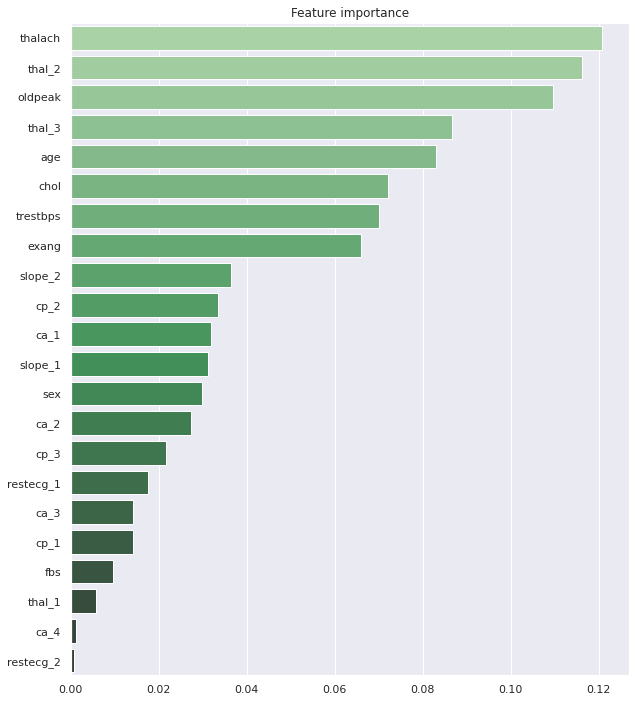

In [65]:
#let's check for the important features using a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
params={'random_state':0, 'n_jobs':-1, 'n_estimators':500, 'max_depth':8}
        
classifier=RandomForestClassifier(**params)
classifier=classifier.fit(X,y)
        
important_features = pd.Series(data=classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=important_features.index, x=important_features.values, palette="Greens_d", orient='h')
plt.show()

<div class="alert alert alert-success">
From the above graph, we see that 'thalach' or Maximum Heart Rate Achieved is the most important feature in predicting a Heart Attack, followed by thal_2 (Thalassemia_2, oldpeak(ST depression induced by exercise relative to rest), Thalassemia_3, age etc.  

In [66]:
#Let's train the model using the first five important features from the Random Forest Classifier
X_reduce=df_new[['thalach', 'thal_2', 'oldpeak', 'thal_3', 'age']]
y=df_new[['target']]

In [67]:
from sklearn.model_selection import train_test_split
X_reduce_train, X_reduce_test, y_train, y_test = train_test_split(X_reduce, y, test_size=0.2, random_state=0)

In [68]:
Logreg=LogisticRegression()
Logreg.fit(X_reduce_train, y_train)
y_pred1=Logreg.predict(X_reduce_test)

print('Accuracy of Logistic Regression =  ', accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Accuracy of Logistic Regression =   83.60655737704919
[[21  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [69]:
rfc=RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_reduce_train, y_train)
y_pred2=rfc.predict(X_reduce_test)

print('Accuracy of Random Forest Classifier =  ',accuracy_score(y_test, y_pred2)*100)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy of Random Forest Classifier =   81.9672131147541
[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



<div class="alert alert-danger">
After using features from Random Forest Classifier Feature Selection, the accuracy of Logistic Regression has slightly improved to 83.6066% and the accuracy of Random Forest Classifier to 81.9672%

## Inference:

#### After selecting all the features:

<div class="alert alert-info">
Accuracy of Logistic Regression with all the features : 77.0492%  
   
    f1_score :  0.79
   
Accuracy of Random Forest Classifier with all the features : 78.6885% 
    
    f1_score : 0.81


#### After selecting features based on p-value from statts model:

<div class="alert alert-info">
   
Accuracy of Logistic Regression with 7 features : 81.9672% 
    
    f1_score : 0.84
    

Accuracy of Random Forest Classifier with 7 features : 75.4098%
    
    f1_score: 0.78


#### Using Feature Selection by Random Forest Classifier:

<div class="alert alert-info">

Accuracy of Logistic Regression using 5 important features: 83.6066%
    
    f1_score: 0.86
Accuracy of Random Forest Classifier using 5 important features: 81.9672% 
   
    f1_score:0.83